In [2]:
import sys
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
def load_2Dimages(folder):
    images = []
    # Keep the information of axis z (each slice)
    file_list = sorted(file for file in os.listdir(folder) if file.endswith('.png'))

    for filename in file_list:
        path = os.path.join(folder, filename)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # grayscale
        if img is not None:
            images.append(img)
    return np.array(images)

# No patch anymore for 2D
def patch_original(folder_path):
    images2D = load_2Dimages(folder_path)
    original = np.stack((images2D,)*3, axis=-1)
    
    return original

def patch_mask(folder_path):
    images2D = load_2Dimages(folder_path)
    mask_2_channels = np.zeros(images2D.shape + (2,))
    indices_greater_than_0_5 = np.where(images2D > 5)
    for idx in zip(*indices_greater_than_0_5):
        mask_2_channels[idx[0],idx[1],idx[2],0] = 1

    indices_smaller_than_0_5 = np.where(images2D < 5)
    for idx in zip(*indices_smaller_than_0_5):
        mask_2_channels[idx[0],idx[1],idx[2],1] = 1

    return mask_2_channels

In [5]:
# Training set
path_train_original1 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Original/TAC1"
path_train_mask1 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Mask/TAC1"
path_train_original2 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Original/TAC2"
path_train_mask2 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Mask/TAC2"
path_train_original3 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Original/TAC3"
path_train_mask3 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Mask/TAC3"
path_train_original4 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Original/TAC4"
path_train_mask4 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Mask/TAC4"
path_train_original5 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Original/TAC5"
path_train_mask5 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Mask/TAC5"
path_train_original6 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Original/TAC6"
path_train_mask6 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Mask/TAC6"
path_train_original7 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Original/TAC7"
path_train_mask7 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Mask/TAC7"

# Validation set
path_validation_original = "/Users/yichunsun/Desktop/TFM/Data/3D/Validation/Original"
path_validation_mask = "/Users/yichunsun/Desktop/TFM/Data/3D/Validation/Mask"

# Test set
path_test_original = "/Users/yichunsun/Desktop/TFM/Data/3D/Test/Original"
path_test_mask = "/Users/yichunsun/Desktop/TFM/Data/3D/Test/Mask"

In [6]:
train_original1_2D = patch_original(path_train_original1)
train_mask1_2D = patch_mask(path_train_mask1)
train_original2_2D = patch_original(path_train_original2)
train_mask2_2D = patch_mask(path_train_mask2)
train_original3_2D = patch_original(path_train_original3)
train_mask3_2D = patch_mask(path_train_mask3)
train_original4_2D = patch_original(path_train_original4)
train_mask4_2D = patch_mask(path_train_mask4)
train_original5_2D = patch_original(path_train_original5)
train_mask5_2D = patch_mask(path_train_mask5)
train_original6_2D = patch_original(path_train_original6)
train_mask6_2D = patch_mask(path_train_mask6)
train_original7_2D = patch_original(path_train_original7)
train_mask7_2D = patch_mask(path_train_mask7)

train_original8_2D = patch_original(path_validation_original)
train_mask8_2D = patch_mask(path_validation_mask)

train_original9_2D = patch_original(path_test_original)
train_mask9_2D = patch_mask(path_test_mask)

In [39]:
validation_original_2D = train_original9_2D
validation_mask_2D = train_mask9_2D

test_original_2D = train_original1_2D
test_mask_2D = train_mask1_2D

# For training: Stacking 2D images into a batch
train_original_2D = np.concatenate((train_original5_2D, train_original6_2D, train_original7_2D, train_original8_2D,
                             train_original2_2D, train_original3_2D, train_original4_2D), axis=0)
train_mask_2D = np.concatenate((train_mask5_2D, train_mask6_2D, train_mask7_2D, train_mask8_2D, 
                                train_mask2_2D, train_mask3_2D, train_mask4_2D), axis=0)

In [40]:
# Save the data of 2D images
np.save('/Users/yichunsun/Desktop/TFM/Data/2D/2D_original_cv/2D_train_original9.npy', train_original_2D)
np.save('/Users/yichunsun/Desktop/TFM/Data/2D/2D_original_cv/2D_train_mask9.npy', train_mask_2D)
np.save('/Users/yichunsun/Desktop/TFM/Data/2D/2D_original_cv/2D_validation_original9.npy', validation_original_2D)
np.save('/Users/yichunsun/Desktop/TFM/Data/2D/2D_original_cv/2D_validation_mask9.npy', validation_mask_2D)
np.save('/Users/yichunsun/Desktop/TFM/Data/2D/2D_original_cv/2D_test_original9.npy', test_original_2D)
np.save('/Users/yichunsun/Desktop/TFM/Data/2D/2D_original_cv/2D_test_mask9.npy', test_mask_2D)

In [ ]:
# Check the dimensions
print("Dimension of the training 2D original image:", train_original_2D.shape)
print("Dimension of the mask of training set:", train_mask_2D.shape)
print("Dimension of the validation 2D original image:", validation_original_2D.shape)
print("Dimension of the mask of validation set:", validation_mask_2D.shape)
print("Dimension of the test 2D original image:", test_original_2D.shape)
print("Dimension of the mask of test set:", test_mask_2D.shape)

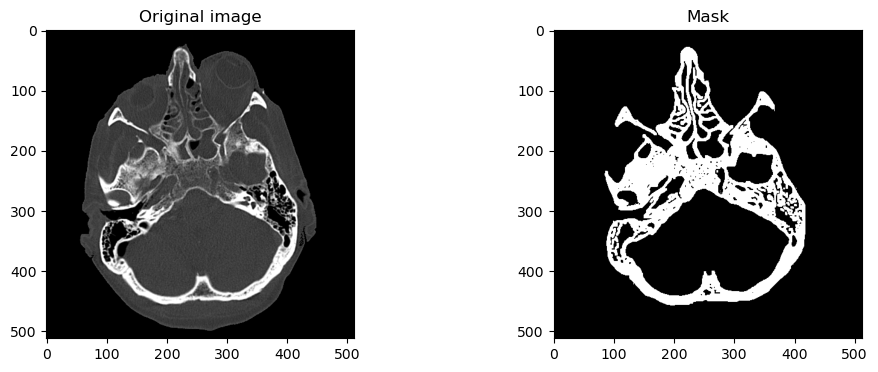

In [32]:
# Check the images 2D
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].imshow(train_original_2D[235,:,:,0], cmap='gray')
axes[0].set_title('Original image')

axes[1].imshow(train_mask_2D[235,:,:,0], cmap='gray')
axes[1].set_title('Mask')
    
plt.show()